In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
file_num = str(input("Enter file number: "))
# 511, 519, 520, 523

Enter file number: 523


In [3]:
# train = pd.read_csv("standardized_data_{}.csv".format(file_num))
train = pd.read_csv("data_{}.csv".format(file_num))
train.head()

,cpu-cycles,instructions,branch-misses,cache-misses,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss
0,1257249834,2422962741,6746347,3576935,14070058,56199823,620619,1251480,7670918,429562,259525,72715,5095141,2334996,6203872
1,1367243933,2413263410,6574984,3412869,16707356,54272984,472583,749458,6636790,562865,183162,74829,5101544,3144452,9617576
2,952499181,1763947509,5497024,3055430,14491237,45684385,478928,1110124,8340426,308349,265477,139428,6184179,3038841,7952444
3,682970691,1992747258,1799133,2716939,7133433,8120495,531720,630050,1563035,301712,132149,40858,411718,1183554,2874528
4,1370646766,6025216988,2297256,2894883,3718043,969584,1401152,709846,2312402,8080,2646,10813,118330,316632,1128166


In [4]:
train['CPI'] = train['cpu-cycles']/train['instructions']
train.head()

,cpu-cycles,instructions,branch-misses,cache-misses,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss,CPI
0,1257249834,2422962741,6746347,3576935,14070058,56199823,620619,1251480,7670918,429562,259525,72715,5095141,2334996,6203872,0.518889
1,1367243933,2413263410,6574984,3412869,16707356,54272984,472583,749458,6636790,562865,183162,74829,5101544,3144452,9617576,0.566554
2,952499181,1763947509,5497024,3055430,14491237,45684385,478928,1110124,8340426,308349,265477,139428,6184179,3038841,7952444,0.539982
3,682970691,1992747258,1799133,2716939,7133433,8120495,531720,630050,1563035,301712,132149,40858,411718,1183554,2874528,0.342728
4,1370646766,6025216988,2297256,2894883,3718043,969584,1401152,709846,2312402,8080,2646,10813,118330,316632,1128166,0.227485


In [5]:
# train.corr()

In [6]:
for i in train:
    if i!='instructions' and i!='CPI':
#         print((i))
        train[str(i)] = train[str(i)]/train['instructions']
train.head()

,cpu-cycles,instructions,branch-misses,cache-misses,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss,CPI
0,0.518889,2422962741,0.002784,0.001476,0.005807,0.023195,0.000256,0.000517,0.003166,0.000177,1.071106e-04,0.000030,0.002103,0.000964,0.002560,0.518889
1,0.566554,2413263410,0.002725,0.001414,0.006923,0.022489,0.000196,0.000311,0.002750,0.000233,7.589806e-05,0.000031,0.002114,0.001303,0.003985,0.566554
2,0.539982,1763947509,0.003116,0.001732,0.008215,0.025899,0.000272,0.000629,0.004728,0.000175,1.505016e-04,0.000079,0.003506,0.001723,0.004508,0.539982
3,0.342728,1992747258,0.000903,0.001363,0.003580,0.004075,0.000267,0.000316,0.000784,0.000151,6.631498e-05,0.000021,0.000207,0.000594,0.001442,0.342728
4,0.227485,6025216988,0.000381,0.000480,0.000617,0.000161,0.000233,0.000118,0.000384,0.000001,4.391543e-07,0.000002,0.000020,0.000053,0.000187,0.227485


In [7]:
train = train.drop(['cpu-cycles','instructions','cache-misses','branch-load-misses'], axis=1)

train.head()

,branch-misses,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss,CPI
0,0.002784,0.005807,0.023195,0.000256,0.000517,0.000177,1.071106e-04,0.000030,0.002103,0.000964,0.002560,0.518889
1,0.002725,0.006923,0.022489,0.000196,0.000311,0.000233,7.589806e-05,0.000031,0.002114,0.001303,0.003985,0.566554
2,0.003116,0.008215,0.025899,0.000272,0.000629,0.000175,1.505016e-04,0.000079,0.003506,0.001723,0.004508,0.539982
3,0.000903,0.003580,0.004075,0.000267,0.000316,0.000151,6.631498e-05,0.000021,0.000207,0.000594,0.001442,0.342728
4,0.000381,0.000617,0.000161,0.000233,0.000118,0.000001,4.391543e-07,0.000002,0.000020,0.000053,0.000187,0.227485


In [8]:
train_data = train.values
print(len(train.values))
train_len = int(0.8*len(train.values))
X = train_data[:train_len,:-1]
Y = train_data[:train_len,-1].reshape(train_len,1)
X_test = train_data[train_len:,:-1]
Y_test = train_data[train_len:,-1].reshape(len(X_test),1)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# reg_nnls = LinearRegression()
reg_nnls = LinearRegression(positive=True)
ans = reg_nnls.fit(X, Y)
y_pred_nnls = ans.predict(X_test)
r2_score_nnls = r2_score(Y_test, y_pred_nnls)

# r2_score_nnls = -1*r2_score_nnls/10
print("NNLS R2 score", r2_score_nnls)
ans.coef_, ans.intercept_
adjusted_R_squared = 1 - (1-r2_score_nnls)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print('Adjusted_R_square:',adjusted_R_squared)

1747
NNLS R2 score 0.4475650611405039
Adjusted_R_square: 0.4295864092841297


In [9]:
np.sum(ans.coef_)+ans.intercept_

array([1.10543073])

In [10]:
Y.mean()

0.7210289136290484

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score
predictions = ans.predict(X_test) 

In [12]:
print('mean_squared_error : ', mean_squared_error(Y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(Y_test, predictions))
print('R2 : ',r2_score(Y_test, predictions))

mean_squared_error :  0.0019570443977477824
mean_absolute_error :  0.01586924423680937
R2 :  0.4475650611405039


In [13]:
residuals = Y_test - predictions
# print('Residual : ', Y_test - predictions )

In [14]:
error = (1/X_test.shape[0])*np.sum(np.abs(predictions - Y_test))

In [15]:
error

0.01586924423680937

In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
print ( "Test error is :" , error *100 , "%" )
print ( "Test Accuracy is :" , (1- error) *100 , "%" )

Test error is : 1.5869244236809368 %
Test Accuracy is : 98.41307557631906 %


In [18]:
# Calculate the variance of each group
import scipy.stats

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = Y.size-1
   dun = predictions.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test(X_test, predictions)

# A general rule of thumb that is often used in regression analysis is that if F > 2.5 then we can reject the null hypothesis.
# If the P-value is lower than 0.05, we can reject the null hypothesis and conclude that it exist a relationship between the variables.

(138.69097267100744, 1.1102230246251565e-16)

<Axes: xlabel='predicted', ylabel='actual'>

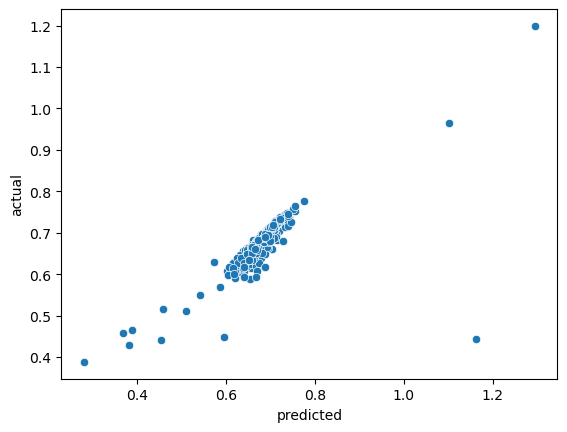

In [19]:
# create a DataFrame of predicted values and residuals
data = {
    'actual': [i[0] for i in Y_test],
    'predicted': [i[0] for i in predictions], 
    'residuals': [i[0] for i in residuals]
}

df = pd.DataFrame(data)
# sns.scatterplot(data=df, x="predicted", y="residuals")
# plt.axhline(y=0)

sns.scatterplot(data=df, x="predicted", y="actual")
# plt.axhline(y=0)

In [20]:
ans.coef_,ans.intercept_

(array([[0.02781607, 0.08435225, 0.00800843, 0.20910975, 0.00589461,
         0.        , 0.0151544 , 0.        , 0.        , 0.03406631,
         0.        ]]),
 array([0.72102891]))